In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 讀檔
file = "data.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)

In [7]:
df

,time,stateRun,private,price,windSpeed,sunshineHour
0,2021-11-01-00,236.4,14.0,600,2.2,0.0
1,2021-11-01-01,281.1,14.0,600,0.4,0.0
2,2021-11-01-02,281.1,14.0,600,0.8,0.0
3,2021-11-01-03,281.0,14.0,600,1.5,0.0
4,2021-11-01-04,281.0,14.0,600,1.4,0.0
...,...,...,...,...,...,...
2875,2022-02-28-19,131.5,19.1,597,0.0,0.0
2876,2022-02-28-20,131.5,19.1,597,0.3,0.0
2877,2022-02-28-21,129.5,19.1,597,0.3,0.0
2878,2022-02-28-22,198.4,19.1,597,0.0,0.0


In [8]:
# 原本為2021-11-01-00，現將其拆解並新增欄位存取資料
df['month'] = df['time'].str.split('-', expand = True)[1]
df['month'] = df['month'].astype(int)
df['date'] = df['time'].str.split('-', expand = True)[2]
df['date'] = df['date'].astype(int)
df['hour'] = df['time'].str.split('-', expand = True)[3]
df['hour'] = df['hour'].astype(int)

In [9]:
# 分析資料
df[['stateRun','private','price']].describe()

,stateRun,private,price
count,2880.000000,2880.000000,2880.000000
mean,193.332569,14.433507,594.712847
std,138.063247,1.059340,12.446056
min,2.000000,5.000000,455.000000
25%,80.000000,14.000000,595.000000
50%,134.700000,14.000000,596.000000
75%,285.900000,15.100000,600.000000
max,655.000000,19.100000,600.000000


In [10]:
df['weekday'] = df['date']
df['type'] = df['date']

In [11]:
# 新增星期欄位，以便日後區分平假日
# 有問題，要修改，每個月周一不一樣

for i in range(len(df)):
    if df['month'][i] == 11:
        if df['date'][i] % 7 == 1:
            df['weekday'][i] = 'Mon'
            df['type'][i] = 'weekday'
        elif df['date'][i] % 7 == 2:
            df['weekday'][i] = 'Tue'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 3:
            df['weekday'][i] = 'Wed'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 4:
            df['weekday'][i] = 'Thu'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 5:
            df['weekday'][i] = 'Fri'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 6:
            df['weekday'][i] = 'Sat'
            df['type'][i] = 'weekend'
        else:
            df['weekday'][i] = 'Sun'
            df['type'][i] = 'weekend'
    elif df['month'][i] == 12:
        if df['date'][i] % 7 == 6:
            df['weekday'][i] = 'Mon'
            df['type'][i] = 'weekday'
        elif df['date'][i] % 7 == 0:
            df['weekday'][i] = 'Tue'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 1:
            df['weekday'][i] = 'Wed'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 2:
            df['weekday'][i] = 'Thu'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 3:
            df['weekday'][i] = 'Fri'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 4:
            df['weekday'][i] = 'Sat'
            df['type'][i] = 'weekend'
        else:
            df['weekday'][i] = 'Sun'
            df['type'][i] = 'weekend'
    
    elif df['month'][i] == 1:
        if df['date'][i] % 7 == 3:
            df['weekday'][i] = 'Mon'
            df['type'][i] = 'weekday'
        elif df['date'][i] % 7 == 4:
            df['weekday'][i] = 'Tue'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 5:
            df['weekday'][i] = 'Wed'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 6:
            df['weekday'][i] = 'Thu'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 0:
            df['weekday'][i] = 'Fri'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 1:
            df['weekday'][i] = 'Sat'
            df['type'][i] = 'weekend'
        else:
            df['weekday'][i] = 'Sun'
            df['type'][i] = 'weekend'
    
    
    elif df['month'][i] == 2:
        if df['date'][i] % 7 == 0:
            df['weekday'][i] = 'Mon'
            df['type'][i] = 'weekday'
        elif df['date'][i] % 7 == 1:
            df['weekday'][i] = 'Tue'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 2:
            df['weekday'][i] = 'Wed'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 3:
            df['weekday'][i] = 'Thu'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 4:
            df['weekday'][i] = 'Fri'
            df['type'][i] = 'weekday'
        elif df['date'][i]  % 7 == 5:
            df['weekday'][i] = 'Sat'
            df['type'][i] = 'weekend'
        else:
            df['weekday'][i] = 'Sun'
            df['type'][i] = 'weekend'    

In [12]:
df['volume'] = df['stateRun'] + df['private']

In [13]:
df.set_index('time', inplace = True)

In [14]:
df

,stateRun,private,price,windSpeed,sunshineHour,month,date,hour,weekday,type,volume
time,,,,,,,,,,,
2021-11-01-00,236.4,14.0,600,2.2,0.0,11,1,0,Mon,weekday,250.4
2021-11-01-01,281.1,14.0,600,0.4,0.0,11,1,1,Mon,weekday,295.1
2021-11-01-02,281.1,14.0,600,0.8,0.0,11,1,2,Mon,weekday,295.1
2021-11-01-03,281.0,14.0,600,1.5,0.0,11,1,3,Mon,weekday,295.0
2021-11-01-04,281.0,14.0,600,1.4,0.0,11,1,4,Mon,weekday,295.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28-19,131.5,19.1,597,0.0,0.0,2,28,19,Mon,weekday,150.6
2022-02-28-20,131.5,19.1,597,0.3,0.0,2,28,20,Mon,weekday,150.6
2022-02-28-21,129.5,19.1,597,0.3,0.0,2,28,21,Mon,weekday,148.6


In [45]:
#用月份分割資料
df_nov = df[df['month'] == 2][0:71]
df_dec = df[df['month'] == 12]
df_jan = df[df['month'] == 1]
df_feb = df[df['month'] == 2]
arimaData_nov = df_nov["volume"]
arimaData_dec = df_dec["volume"]
arimaData_jan = df_jan["volume"]
arimaData_feb = df_feb["volume"]
#三天的資料
arimaData_nov = df_nov["volume"][0:71]
#用項目分割資料
arimaData_v = df["volume"]
arimaData_p = df["price"]

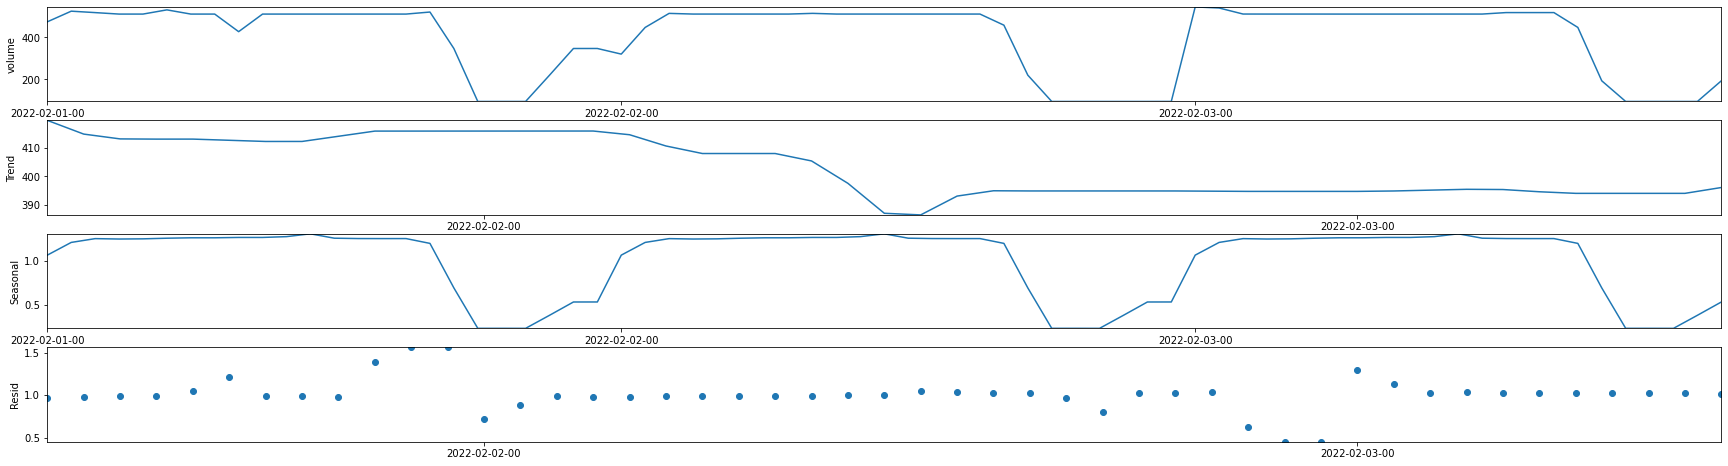

In [46]:
# 11~02月、三天
# 原始資料
result = seasonal_decompose(arimaData_nov, model = "multiplicative", period = 24)
plt.figure(figsize = (30,8))
plt.subplot(4,1,1)
plt.plot(result.observed, label = "volume")
plt.ylabel("volume")
plt.xticks(df_nov.index[::24], rotation = 0)#調整x軸刻度，每隔24個
plt.margins(0)
# 趨勢圖
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.ylabel("Trend")
plt.xticks(df_nov.index[::24], rotation = 0)
plt.margins(0)
# 季節性圖
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.ylabel("Seasonal")
plt.xticks(df_nov.index[::24], rotation = 0)
plt.margins(0)
# 殘差圖
plt.subplot(4,1,4)
plt.scatter(df_nov.index, result.resid)
plt.ylabel("Resid")
plt.xticks(df_nov.index[::24], rotation = 0)
plt.margins(0)

<function matplotlib.pyplot.show(close=None, block=None)>

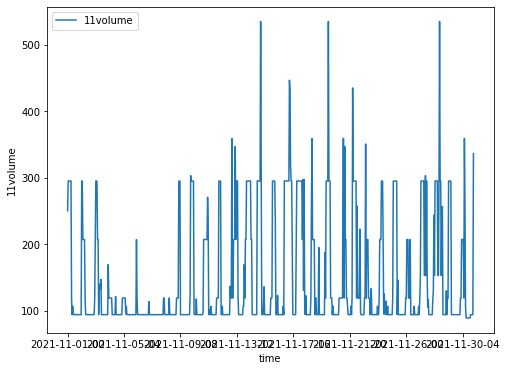

In [58]:
arimaData_nov.plot(figsize = (8,6), label = "11volume")
plt.ylabel("11volume")
plt.legend()
plt.show

In [55]:
#平穩性檢驗
def adf_test(timeseries):
    #perform dickey fuller test
    print("Results of Dickey Fuller Test\n")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#lags used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    
    #寫個自動判斷式
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)")
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")

adf_test(arimaData_v)
print("volume")
adf_test(arimaData_p)
print("price")

Results of Dickey Fuller Test

Test Statistic                   -3.768875
p-value                           0.003242
#lags used                       27.000000
Number of Observations Used    2852.000000
Criterical Value (1%)            -3.432645
Criterical Value (5%)            -2.862554
Criterical Value (10%)           -2.567310
dtype: float64
The data is stationary. (Criterical Value 1%)
volume
Results of Dickey Fuller Test

Test Statistic                -8.434437e+00
p-value                        1.832843e-13
#lags used                     2.800000e+01
Number of Observations Used    2.851000e+03
Criterical Value (1%)         -3.432646e+00
Criterical Value (5%)         -2.862554e+00
Criterical Value (10%)        -2.567310e+00
dtype: float64
The data is stationary. (Criterical Value 1%)
price


In [ ]:
#將資料整理成平穩
#一階差分 lags:1,12

#diff_1 = arima_data - arima_data.shift(1)
#diff_1 = diff_1.dropna()
#diff_1.plot(figsize = (6,4), label = "diff_1")
#plt.legend();

#adf_test(diff_1)

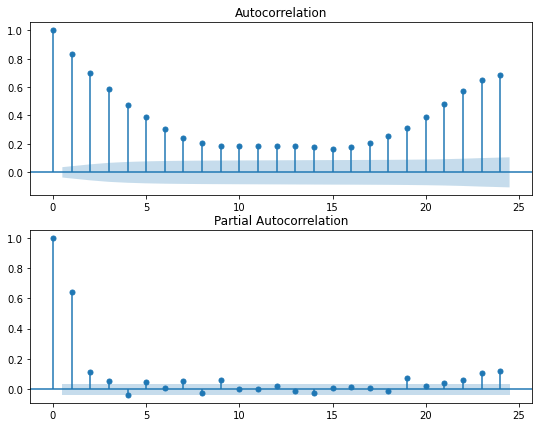

In [66]:
#correlogram

f = plt.figure(facecolor = 'white', figsize = (9,7))
ax1 = f.add_subplot(211)
plot_acf(arimaData_v, lags = 24, ax = ax1);
ax2 = f.add_subplot(212);
plot_pacf(arimaData_p, lags = 24, ax = ax2);
plt.rcParams['axes.unicode_minus'] = False
plt.show()

ARIMA(0, 1, 0): AIC = 33465.03300526223
ARIMA(0, 1, 1): AIC = 33420.50762068297
ARIMA(0, 1, 2): AIC = 33413.810514775214
ARIMA(1, 1, 0): AIC = 33425.33444476378
ARIMA(1, 1, 1): AIC = 33145.9889492589
ARIMA(1, 1, 2): AIC = 33147.949286843315
ARIMA(2, 1, 0): AIC = 33418.92460133957
ARIMA(2, 1, 1): AIC = 33147.94340693084
ARIMA(2, 1, 2): AIC = 33099.43875600216
ARIMA(3, 1, 0): AIC = 33416.723199435524
ARIMA(3, 1, 1): AIC = 33140.931038867355
ARIMA(3, 1, 2): AIC = 33068.4125436738
This best model is ARIMA(3, 1, 2) based on argmin AIC.


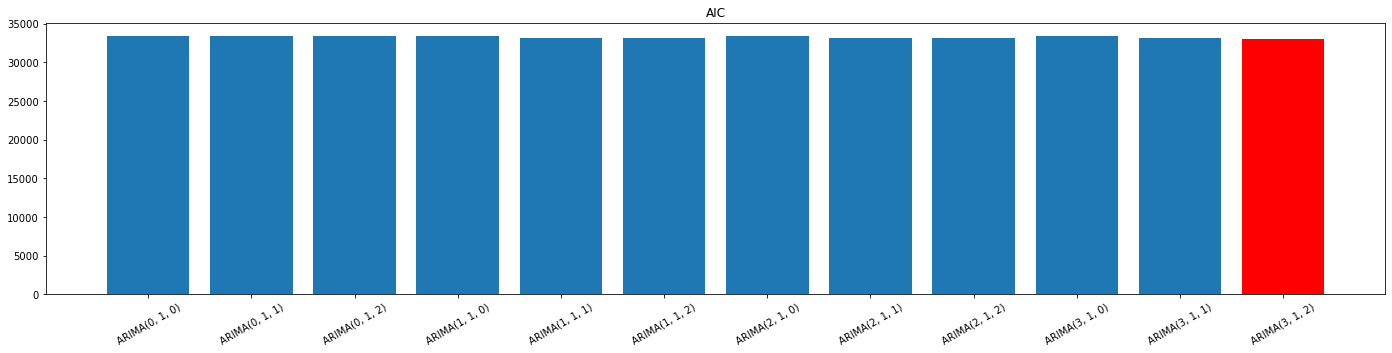

In [67]:
import statsmodels.api as sm
def arima_AIC(data, p = 4, d = 3, q = 4):
    best_AIC = ["pdq", 50000]
    L = len(data)
    AIC = []
    name = []
    for i in range(p):
        for j in range(1, d):
            for k in range(q):
                model = ARIMA(data, order = (i, j, k))
                #fitted = model.fit(disp = -1)
                fitted = model.fit()
                AIC.append(fitted.aic)
                name.append(f"ARIMA({i}, {j}, {k})")
                print(f"ARIMA({i}, {j}, {k}): AIC = {fitted.aic}")
                if fitted.aic < best_AIC[1]:
                    best_AIC[0] = f"ARIMA({i}, {j}, {k})"
                    best_AIC[1] = fitted.aic
    print(f"This best model is {best_AIC[0]} based on argmin AIC.")
    plt.figure(figsize = (24,5))
    plt.bar(name, AIC)
    plt.bar(best_AIC[0], best_AIC[1], color = "red")
    plt.xticks(rotation=30)
    plt.title("AIC")
    plt.savefig("Arima AIC")
    plt.show()
arima_AIC(arimaData_v, 4,2,3)

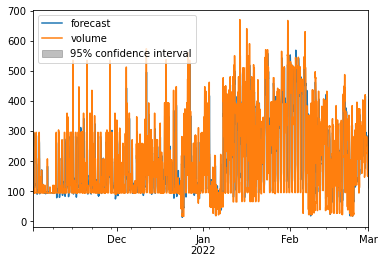

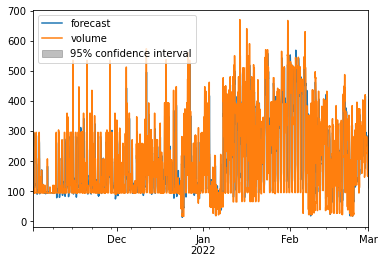

In [68]:
model = ARIMA(arimaData_v, order = (3,1,2)) #修改p,d,q參數
fitted = model.fit(disp = -1)
fitted.plot_predict(1, len(df))

ARIMA(0,1,0)：MSE=28505.89265496417
ARIMA(0,1,1)：MSE=28597.363894620456
ARIMA(0,1,2)：MSE=28976.082415859582
ARIMA(1,1,0)：MSE=28551.741204931568
ARIMA(1,1,1)：MSE=10866.283033792603
ARIMA(1,1,2)：MSE=10866.470534535136
ARIMA(2,1,0)：MSE=28581.77752540177
ARIMA(2,1,1)：MSE=10866.471013424229
ARIMA(2,1,2)：MSE=33970.42858063438
This best model is ARIMA(1,1,1) based on argmin MSE.


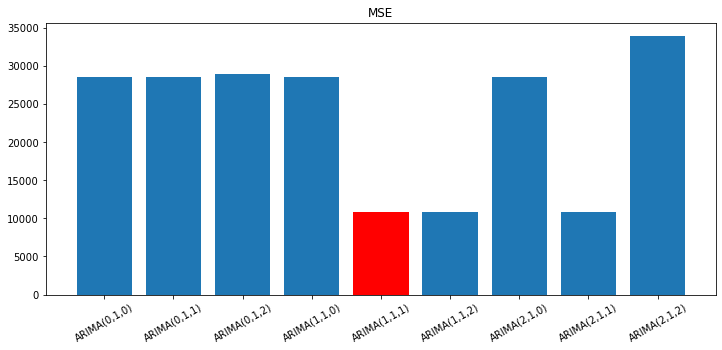

In [69]:
def arima_mse(data, p=4, d=3, q=4):
    period = 168 #預測三期
    best_pdq =["pdq",50000]
    L =len(data)
    train = data[:(L-period)]
    test = data[-period:]
    mse_r = []
    name = []
    for i in range(p):
        for j in range(1,d):
            for k in range(q):            
                model = ARIMA(train, order=(i,j,k))
                fitted = model.fit(disp=-1)
                fc, se, conf = fitted.forecast(period, alpha=0.05)  
                mse = mean_squared_error(test,fc)
                mse_r.append(mse)
                name.append(f"ARIMA({i},{j},{k})")
                print(f"ARIMA({i},{j},{k})：MSE={mse}")
                if mse < best_pdq[1]:
                    best_pdq[0] = f"ARIMA({i},{j},{k})"
                    best_pdq[1] = mse
    print(f"This best model is {best_pdq[0]} based on argmin MSE.")
    plt.figure(figsize=(12,5))
    plt.bar(name, mse_r)
    plt.bar(best_pdq[0], best_pdq[1], color = "red")
    plt.xticks(rotation=30)
    plt.title("MSE")
    plt.savefig("Arima MSE")
    plt.show()
arima_mse(arimaData_v, 3,2,3)

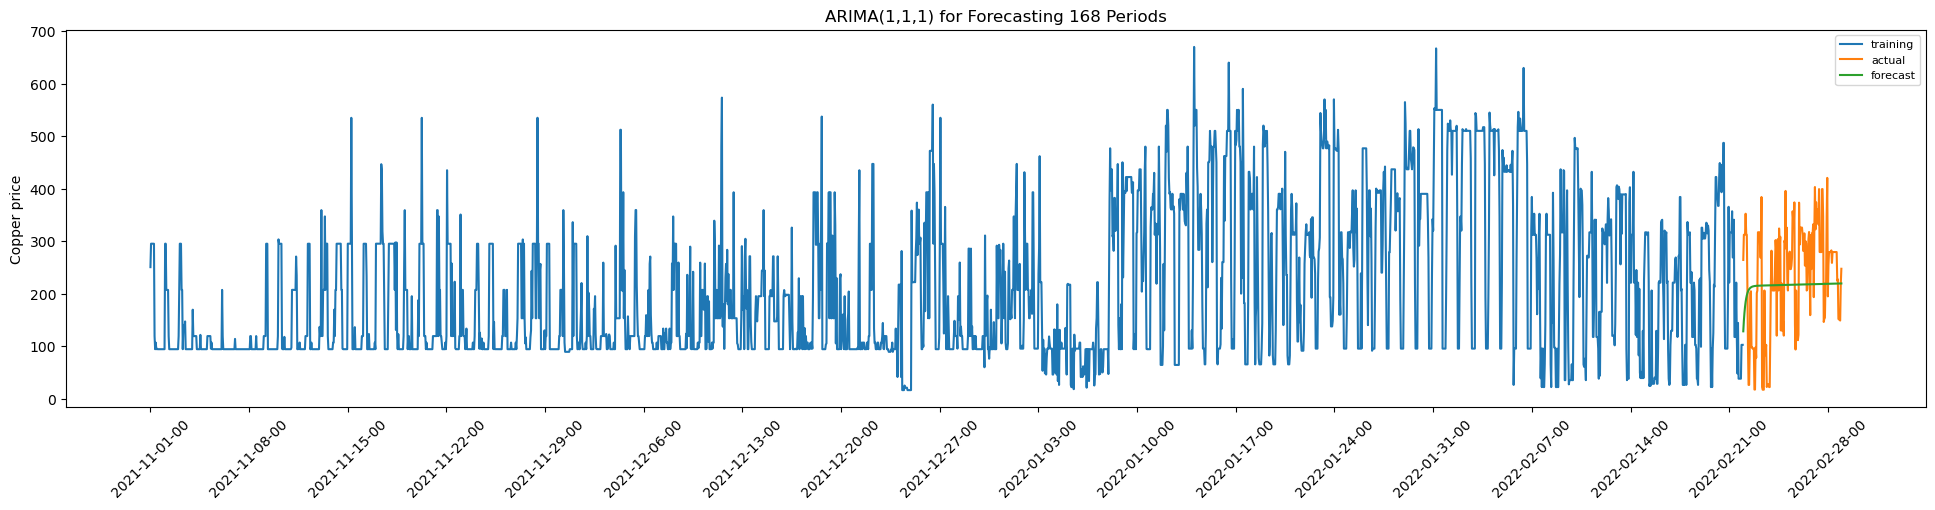

Mean Absolute Error : 88.6615019881559
Mean Squared Error : 10866.283033792603
fc_series: time
2022-02-22-00    128.075156
2022-02-22-01    147.935447
2022-02-22-02    163.239761
2022-02-22-03    175.034793
2022-02-22-04    184.126769
                    ...    
2022-02-28-19    219.181162
2022-02-28-20    219.210533
2022-02-28-21    219.239904
2022-02-28-22    219.269275
2022-02-28-23    219.298646
Length: 168, dtype: float64
Copper price: time
2022-02-22-00    264.1
2022-02-22-01    312.2
2022-02-22-02    312.1
2022-02-22-03    312.1
2022-02-22-04    352.2
                 ...  
2022-02-28-19    150.6
2022-02-28-20    150.6
2022-02-28-21    148.6
2022-02-28-22    217.5
2022-02-28-23    247.3
Name: volume, Length: 168, dtype: float64


In [72]:
#data spilt
period = 168
title = f'ARIMA(1,1,1) for Forecasting {period} Periods'
L = len(arimaData_v)
x_train = arimaData_v[:(L-period)]
x_test = arimaData_v[-period:]
#Build Model 
model = ARIMA(x_train, order=(1, 1, 1)) 
fitted = model.fit(disp=-1)
#Forecast
fc, se, conf = fitted.forecast(period, alpha=0.05) # 95% conf
#Make as pandas series
fc_series = pd.Series(fc, index=x_test.index)
#Plot
plt.figure(figsize=(24,5), dpi=100)
plt.plot(x_train, label='training')
plt.plot(x_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.xticks(df.index[::168], rotation=45)
plt.title(title)
plt.ylabel("Copper price")
plt.legend(loc='upper right', fontsize=8)
plt.savefig(title)
plt.show()
#Results
print(f"Mean Absolute Error : {mean_absolute_error(fc_series,x_test)}")
print(f"Mean Squared Error : {mean_squared_error(fc_series,x_test)}")
print("fc_series:", fc_series)
print("Copper price:", x_test)